Load ACS data into dataframes.  Join and save pickled result

Start with dp05- age-race-sex-demographics  
Since >95% report one race, leave out responses of 2 or more races.  
Since White is the most reported signle race, use other race categories as features  


In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.discrete import discrete_model

In [9]:
DP03 = pd.read_csv('Data/ACS_14_5YR_DP03.csv', skiprows=0)

In [10]:
DP03 = DP03.iloc[1:,:].copy()

In [15]:
econ = DP03[['GEO.id2', 'GEO.display-label', 
             'HC03_VC04',
             'HC03_VC07',
             'HC03_VC15',
             'HC03_VC17',
             'HC03_VC20',
             'HC03_VC28',
             'HC03_VC29',
             'HC03_VC30',
             'HC03_VC31',
             'HC03_VC32',
             'HC03_VC33',
             'HC01_VC36',
             'HC03_VC41',
             'HC03_VC42',
             'HC03_VC43',
             'HC03_VC44',
             'HC03_VC45',
             'HC03_VC50',
             'HC03_VC51',
             'HC03_VC52',
             'HC03_VC53',
             'HC03_VC54',
             'HC03_VC55',
             'HC03_VC56',
             'HC03_VC57',
             'HC03_VC58',
             'HC03_VC59',
             'HC03_VC60',
             'HC03_VC61',
             'HC03_VC62',
             'HC03_VC67',
             'HC03_VC68',
             'HC03_VC69',
             'HC03_VC70',
             'HC03_VC75',
             'HC03_VC76',
             'HC03_VC77',
             'HC03_VC78',
             'HC03_VC79',
             'HC03_VC80',
             'HC03_VC81',
             'HC03_VC82',
             'HC03_VC83',
             'HC03_VC84',
             'HC01_VC85',
             'HC01_VC86',
             'HC03_VC171'
                  ]].copy()

econ.columns = ['FIPS','city_town', 
                'p_in_lab',
                'p_unemployed',
                'p_fem_labforce',
                'p_fem_employed',
                'p_ch6_paremp',
                'p_com_car',
                'p_com_carpool',
                'p_com_transit',
                'p_com_walk',
                'p_com_other',
                'p_com_home',
                'mean_com_time',
                'p_occ_bus',
                'p_occ_serv',
                'p_occ_sales',                
                'p_occ_const',
                'p_occ_trans',               
                'p_ind_agri',
                'p_ind_const',
                'p_ind_manu',               
                'p_ind_whsl',
                'p_ind_retl',
                'p_ind_warehs',
                'p_ind_info',               
                'p_ind_fire',
                'p_ind_prof',
                'p_ind_edu',
                'p_ind_arts',               
                'p_ind_othserv',
                'p_ind_pubadmin',
                'p_class_wage',
                'p_class_govt',
                'p_class_self',
                'p_class_unpaid',
                'p_less10',
                'p_10to15',
                'p_15to25',
                'p_25to35',
                'p_35to50',
                'p_50to75',
                'p_75to100',
                'p_100to150',
                'p_150to200',
                'p_over200',
                'hh_inc_med',
                'hh_inc_mean',
                'p_peop_pov'
               
               
               ]


In [16]:
econ = econ.iloc[:,:2].join(econ.iloc[:,2:].apply(pd.to_numeric)).fillna(0)


In [42]:
econ.head()

,FIPS,city_town,p_in_lab,p_unemployed,p_fem_labforce,p_fem_employed,p_ch6_paremp,p_com_car,p_com_carpool,p_com_transit,...,p_25to35,p_35to50,p_50to75,p_75to100,p_100to150,p_150to200,p_over200,hh_inc_med,hh_inc_mean,p_peop_pov
1,3400100000,"County subdivisions not defined, Atlantic Coun...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3400100100,"Absecon city, Atlantic County, New Jersey",67.3,7.0,61.1,54.9,78.2,85.3,6.5,2.6,...,14.0,15.5,22.2,14.2,11.8,6.6,5.5,61199.0,78485.0,7.2
3,3400102080,"Atlantic City city, Atlantic County, New Jersey",60.4,10.5,57.6,48.1,61.6,41.1,6.9,27.7,...,12.7,14.0,12.1,5.8,4.8,1.7,1.5,26936.0,43111.0,35.8
4,3400107810,"Brigantine city, Atlantic County, New Jersey",61.4,5.5,57.0,52.8,92.3,79.5,7.9,6.1,...,11.0,13.3,15.3,11.4,14.0,7.9,5.0,56310.0,79090.0,11.8
5,3400108680,"Buena borough, Atlantic County, New Jersey",68.4,12.5,61.1,55.2,74.7,86.9,7.5,1.4,...,13.0,14.6,11.5,16.0,12.2,3.4,3.1,44010.0,63908.0,7.9


In [17]:
econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 1 to 570
Data columns (total 49 columns):
FIPS              570 non-null object
city_town         570 non-null object
p_in_lab          570 non-null float64
p_unemployed      570 non-null float64
p_fem_labforce    570 non-null float64
p_fem_employed    570 non-null float64
p_ch6_paremp      570 non-null float64
p_com_car         570 non-null float64
p_com_carpool     570 non-null float64
p_com_transit     570 non-null float64
p_com_walk        570 non-null float64
p_com_other       570 non-null float64
p_com_home        570 non-null float64
mean_com_time     570 non-null float64
p_occ_bus         570 non-null float64
p_occ_serv        570 non-null float64
p_occ_sales       570 non-null float64
p_occ_const       570 non-null float64
p_occ_trans       570 non-null float64
p_ind_agri        570 non-null float64
p_ind_const       570 non-null float64
p_ind_manu        570 non-null float64
p_ind_whsl        570 non-null float64


In [18]:
econ.to_pickle('econ.pkl')

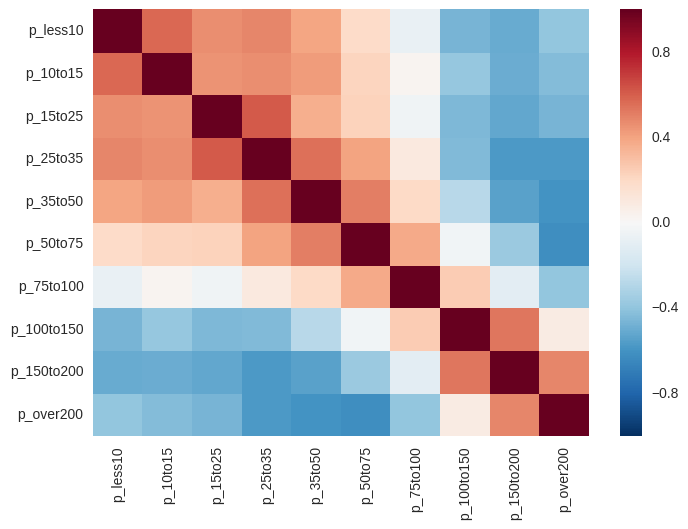

In [26]:
sb.heatmap(econ.loc[:,'p_less10':'p_over200'].corr());

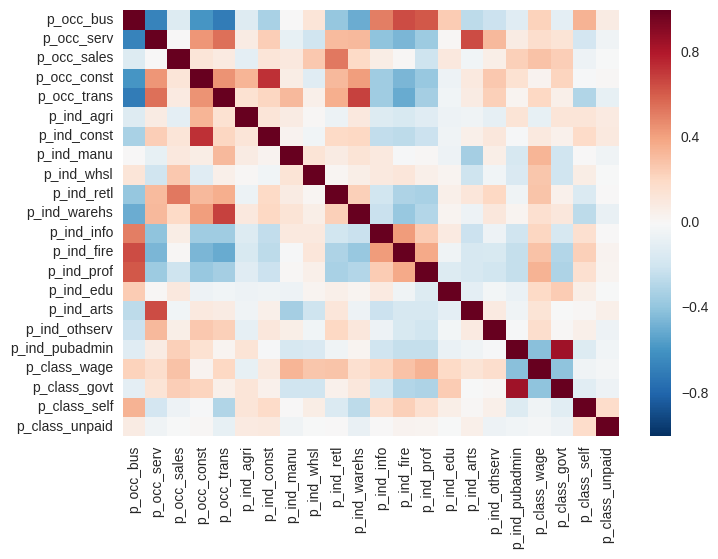

In [29]:
sb.heatmap(econ.loc[:,'p_occ_bus':'p_class_unpaid'].corr());

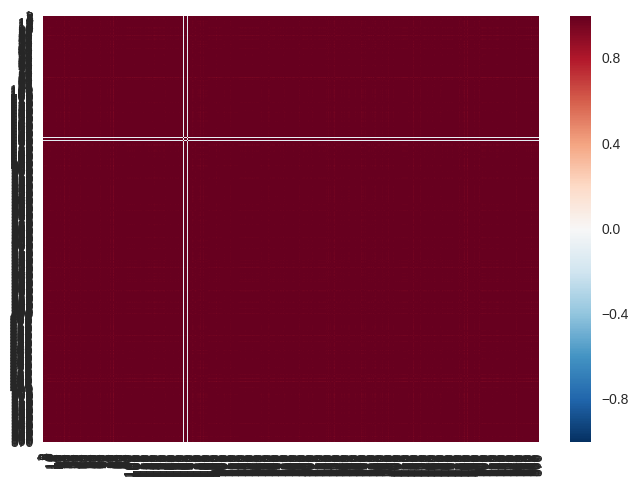

In [41]:
sb.heatmap(econ.T.iloc[2:,:].apply(pd.to_numeric).corr());